Model Training (Random Forest)

In [1]:
# Import Modules
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load the training dataset
train_data = pd.read_csv(r'Project-02-Data/Project 02-Data/train.csv')

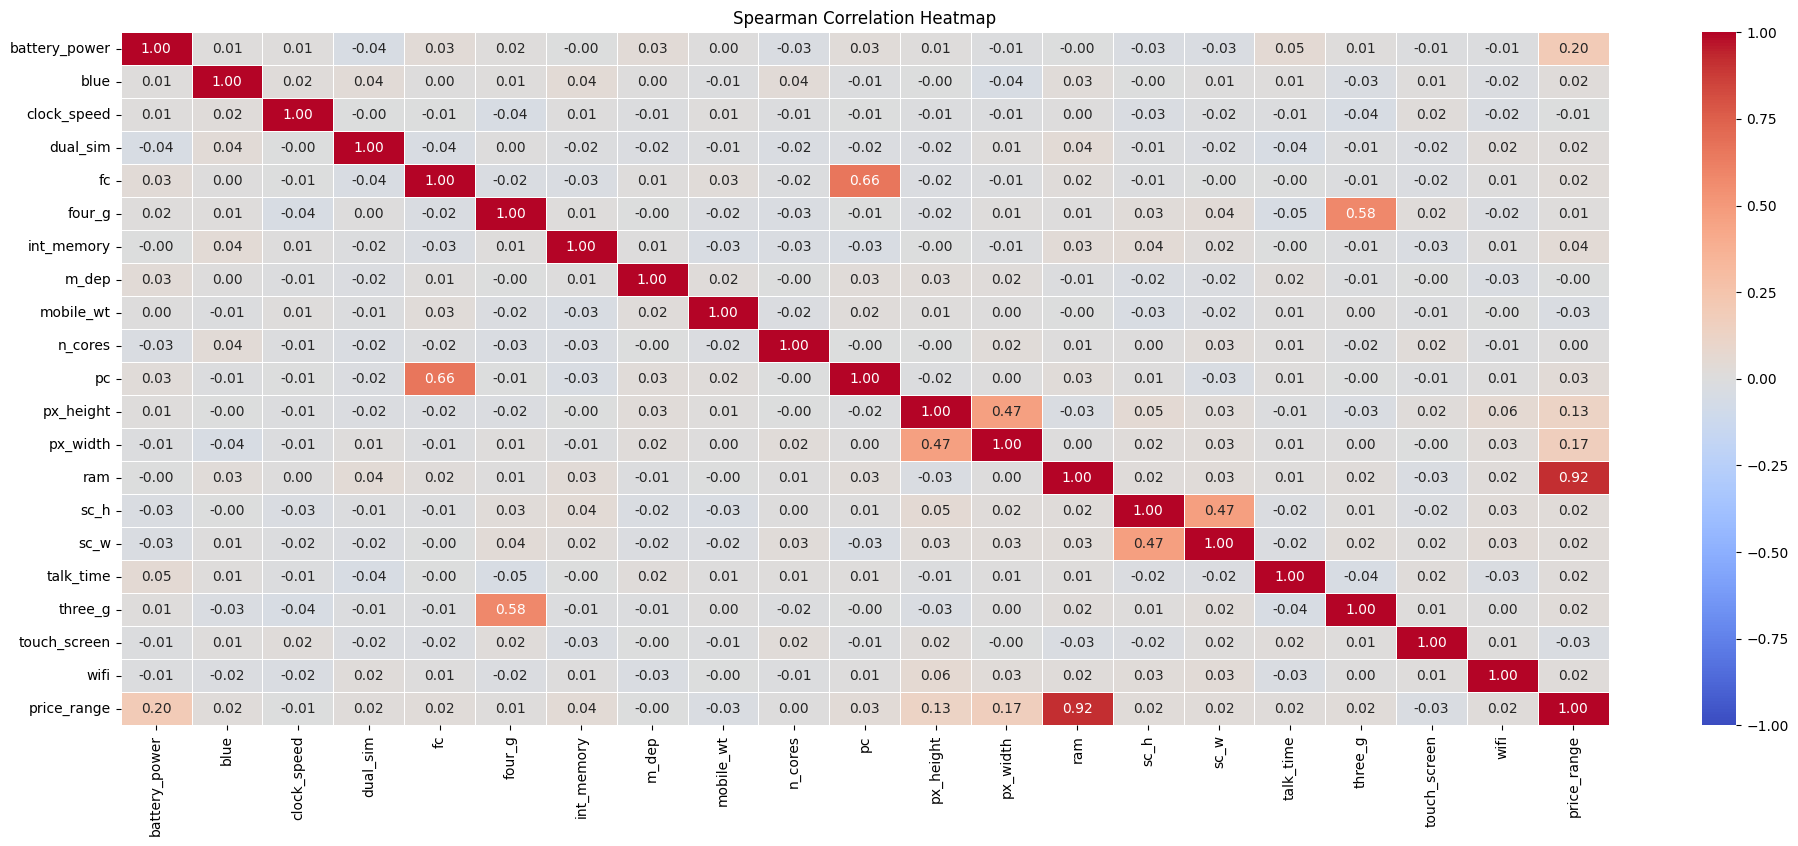

In [18]:
# Calculate Spearman correlation matrix
corr_matrix = train_data.corr(method='spearman')

# Visualize correlation matrix using heatmap
plt.figure(figsize=(24, 9))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5,vmin=-1)
plt.title("Spearman Correlation Heatmap")
plt.show()

In [3]:
# Split features (X) and target (y)
X = train_data.drop('price_range', axis=1)
y = train_data['price_range']

In [4]:
# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [5]:
# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    max_depth=None,    # Allow trees to grow fully
    random_state=42    # For reproducibility
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [6]:
# Make predictions on the validation set
y_pred = rf_model.predict(X_val)

In [7]:
# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='weighted')  # Weighted F1 score
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"F1 Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Validation Accuracy: 0.89
F1 Score: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



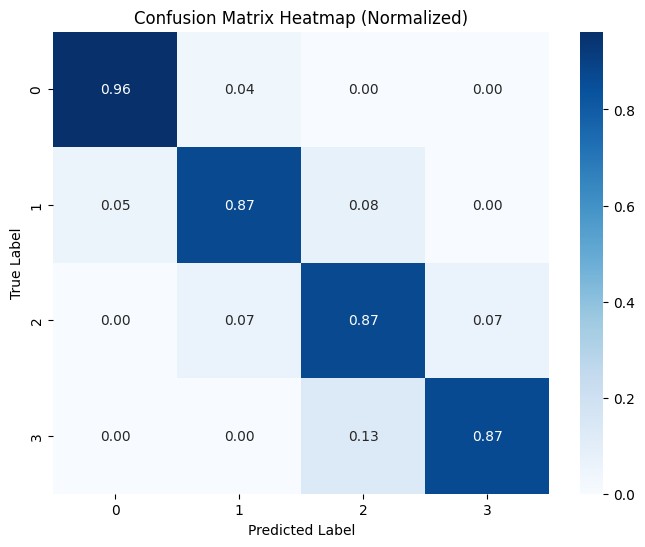

In [8]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_val, y_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize by row

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=[0, 1, 2, 3], yticklabels=[0, 1, 2, 3])
plt.title('Confusion Matrix Heatmap (Normalized)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

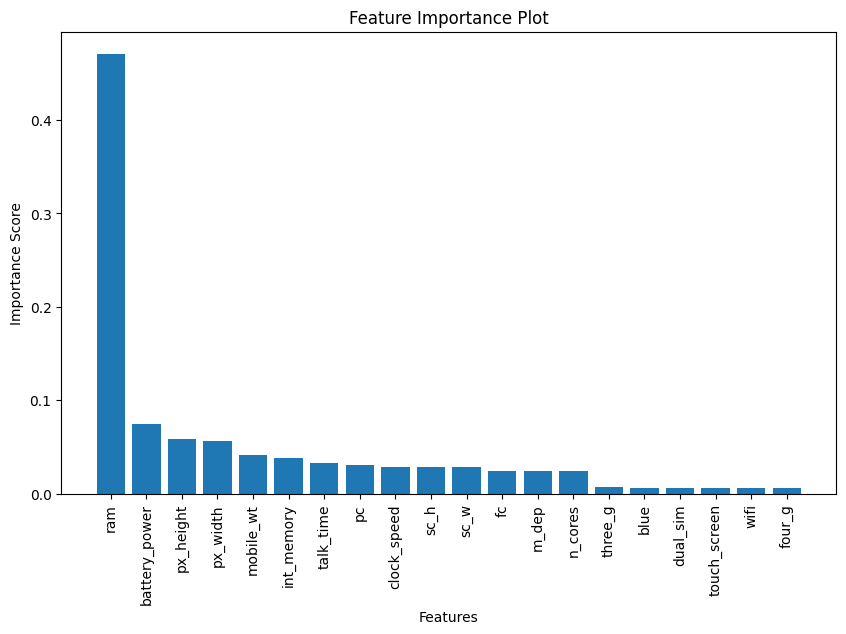

In [9]:
# Feature Importance Plot
feature_importances = rf_model.feature_importances_
feature_names = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), feature_names[sorted_idx], rotation=90)
plt.title('Feature Importance Plot')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [10]:
# Save the model and the scaler for future use
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully!")

Model and scaler saved successfully!


Model Deployment on Test Data

In [11]:
# Load test dataset
test_data = pd.read_csv(r'Project-02-Data/Project 02-Data/test.csv')

In [12]:
# Load the saved model and scaler
rf_model = joblib.load(r'random_forest_model.pkl')
scaler = joblib.load(r'scaler.pkl')

In [13]:
# Normalize the test dataset
test_features = test_data.drop('id', axis=1)  # Exclude non-feature columns like 'id'
test_features_normalized = scaler.transform(test_features)

In [14]:
# Make predictions
predictions = rf_model.predict(test_features_normalized)

In [15]:
# Add predictions to the test dataset
test_data['price_range'] = predictions

In [16]:
# Save predictions to a CSV file
test_data.to_csv('test_predictions.csv', index=False)
print("Predictions saved to 'test_predictions.csv'.")

Predictions saved to 'test_predictions.csv'.


In [17]:
# Test model with manual input
user_input = pd.DataFrame({
    'battery_power': [1900],
    'blue': [1],
    'clock_speed': [0.5],
    'dual_sim': [1],
    'fc': [0],
    'four_g': [1],
    'int_memory': [55],
    'm_dep': [0.9],
    'mobile_wt': [171],
    'n_cores': [1],
    'pc': [1],
    'px_height': [934],
    'px_width': [1241],
    'ram': [3917],
    'sc_h': [15],
    'sc_w': [5],
    'talk_time': [18],
    'three_g': [1],
    'touch_screen': [0],
    'wifi': [1]
    })

# Normalize the features using the saved scaler
user_input_normalized = scaler.transform(user_input)

# Predict the price range using the saved model
prediction = rf_model.predict(user_input_normalized)

# Output the predicted price range
print(f"\nPredicted Price Range: {prediction[0]}")


Predicted Price Range: 3
